# Reference


<img src="https://bimage.interpark.com/partner/goods_image/5/1/9/3/328045193g.jpg" width="200px"></img> <img src="https://bimage.interpark.com/partner/goods_image/4/9/7/7/332334977g.jpg" width="200px"></img> 

# 분류 Classification

## 목차

- 분류기 Classifier 소개
- Support Vector Machine 실습
- K-Nearest Neighbors 실습

# 간단한 분류기의 예

## 분류기란?

강아지와 고양이의 사진을 보고 분류하는 기계

- 분류: Classify
- 기계: Machine
- 분류기: Classifier

## 강아지와 고양이를 구분하는 분류기

<img src="https://i.imgur.com/7QjjVs8.png" width="700px">

## 어떻게 선을 그려야 잘 구분할 수 있을까?

구분선과 강아지, 고양이 사이의 거리를 구하여 거리가 최대가 되는 선을 긋는다.

<img src="https://i.imgur.com/1wPSb5d.png" width="700px">

<img src="https://i.imgur.com/l1NQNvD.png" width="700px">

# SVM 실습

## Iris 데이터셋을 이용한 실습

### 데이터셋 로드

In [1]:
from sklearn.datasets import load_iris
import pandas as pd

iris = load_iris()

df = pd.DataFrame(data=iris['data'], columns=iris['feature_names'])
df['target'] = iris['target']

df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


### 전처리

데이터셋 분할

In [2]:
from sklearn.model_selection import train_test_split

x_train, x_val, y_train, y_val = train_test_split(df.drop(columns=['target']), df[['target']], test_size=0.2, random_state=2021)

print(x_train.shape, y_train.shape)
print(x_val.shape, y_val.shape)

(120, 4) (120, 1)
(30, 4) (30, 1)


### 모델 정의

In [3]:
from sklearn.svm import SVC

model = SVC()

### 학습 Training

In [4]:
model.fit(x_train, y_train['target'])

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

### 검증 Validation

In [ ]:
from sklearn.metrics import accuracy_score

y_pred = model.predict(x_val)

accuracy_score(y_val, y_pred) * 100

100.0

## MNIST 데이터셋을 이용한 실습

손글씨 숫자 이미지를 보고 0-9 를 분류하는 분류기를 만들어봅시다!

### 데이터셋 로드

In [5]:
from sklearn.datasets import load_digits

digits = load_digits()

digits.keys()

dict_keys(['data', 'target', 'target_names', 'images', 'DESCR'])

### 데이터 시각화

In [6]:
data = digits['data']

data.shape

(1797, 64)

In [7]:
target = digits['target']

target.shape

(1797,)

In [9]:
target[:10]

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

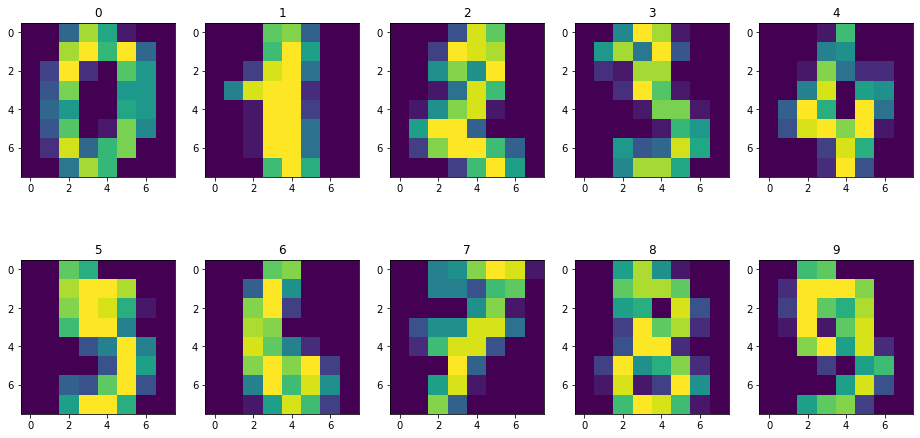

In [10]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(nrows=2, ncols=5, figsize=(16, 8))

for i, ax in enumerate(axes.flatten()):
  ax.imshow(data[i].reshape((8, 8)))
  ax.set_title(target[i])

### 데이터 전처리 - 정규화

In [16]:
data[0]

array([ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
       15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
       12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
        0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
       10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.])

In [17]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

scaled = scaler.fit_transform(data)

scaled[0]

array([0.        , 0.        , 0.3125    , 0.8125    , 0.5625    ,
       0.0625    , 0.        , 0.        , 0.        , 0.        ,
       0.8125    , 0.9375    , 0.625     , 0.9375    , 0.3125    ,
       0.        , 0.        , 0.1875    , 0.9375    , 0.125     ,
       0.        , 0.6875    , 0.5       , 0.        , 0.        ,
       0.26666667, 0.75      , 0.        , 0.        , 0.5       ,
       0.53333333, 0.        , 0.        , 0.35714286, 0.5       ,
       0.        , 0.        , 0.5625    , 0.57142857, 0.        ,
       0.        , 0.25      , 0.6875    , 0.        , 0.0625    ,
       0.75      , 0.4375    , 0.        , 0.        , 0.125     ,
       0.875     , 0.3125    , 0.625     , 0.75      , 0.        ,
       0.        , 0.        , 0.        , 0.375     , 0.8125    ,
       0.625     , 0.        , 0.        , 0.        ])

### 데이터 전처리 - 데이터셋 분할

In [18]:
from sklearn.model_selection import train_test_split

x_train, x_val, y_train, y_val = train_test_split(scaled, target, test_size=0.2, random_state=2021)

print(x_train.shape, y_train.shape)
print(x_val.shape, y_val.shape)

(1437, 64) (1437,)
(360, 64) (360,)


### 학습, 검증

In [19]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

model = SVC()

model.fit(x_train, y_train)

y_pred = model.predict(x_val)

accuracy_score(y_val, y_pred) * 100

97.77777777777777

### 검증 결과 시각화

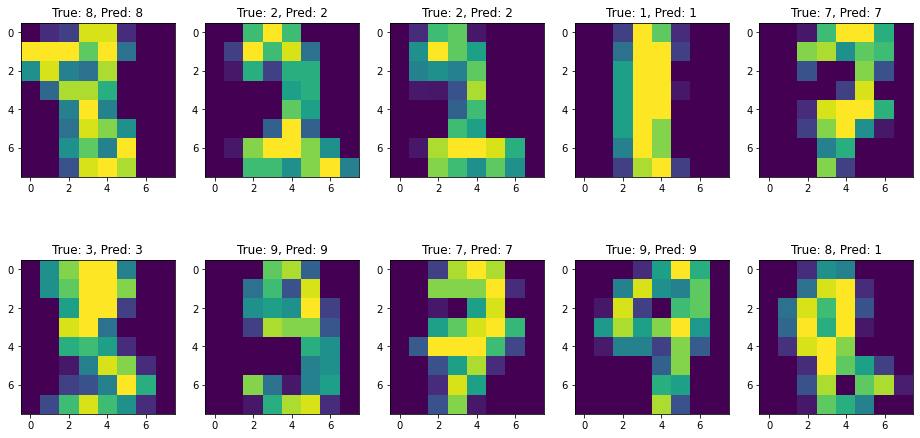

In [20]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(nrows=2, ncols=5, figsize=(16, 8))

for i, ax in enumerate(axes.flatten()):
  ax.imshow(x_val[i].reshape((8, 8)))
  ax.set_title((f'True: {y_val[i]}, Pred: {y_pred[i]}'))

# KNN 실습

## K-Nearest Neighbors

K-최근접 알고리즘

KNN은 비슷한 특성을 가진 개체끼리 군집화하는 알고리즘입니다. 예를 들어 하얀 고양이가 새로 나타났을 때 일정 거리안에 다른 개체들의 개수(k)를 보고 자신의 위치를 결정해요.

k = 2 일때 고양이 분류

<img src="https://i.imgur.com/pQA6nBP.png" width="700px">

## 샘플 데이터로 KNN 이해하기

k = 3

In [21]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.datasets import make_classification
import random

x, y = make_classification(n_samples=100, n_features=2, n_informative=2, n_redundant=0, random_state=1)

In [25]:
new_input = [[random.uniform(-2, 2), random.uniform(-2, 2)]]
new_input

[[-0.4473439307935947, 0.5302717289630507]]

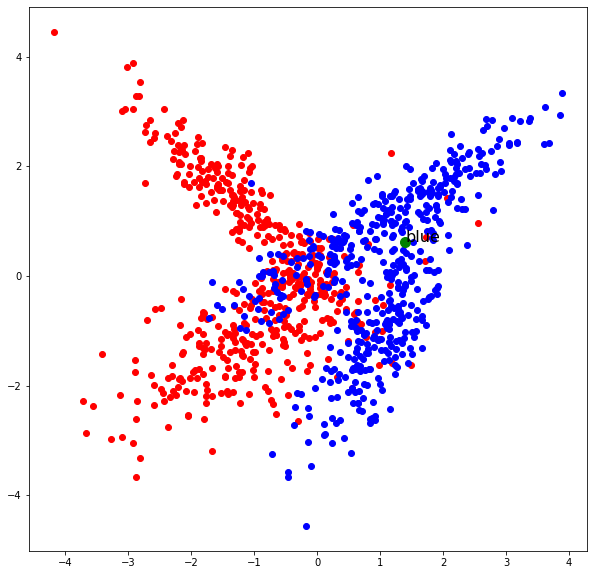

In [28]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.datasets import make_classification
import random

x, y = make_classification(n_samples=1000, n_features=2, n_informative=2, n_redundant=0, random_state=10)

red = x[y == 0]
blue = x[y == 1]

new_input = [[random.uniform(-2, 2), random.uniform(-2, 2)]]

plt.figure(figsize=(10, 10))
plt.scatter(x=red[:, 0], y=red[:, 1], c='r')
plt.scatter(x=blue[:, 0], y=blue[:, 1], c='b')

model = KNeighborsClassifier(n_neighbors=3)
model.fit(x, y)
pred = model.predict(new_input)

pred_label = 'red' if pred == 0 else 'blue'

plt.scatter(new_input[0][0], new_input[0][1], 100, 'g')
plt.annotate(pred_label, xy=new_input[0], fontsize=16)

plt.show()

## MNIST 데이터셋을 이용한 실습

### 모델 정의, 학습

In [31]:
from sklearn.neighbors import KNeighborsClassifier

model = KNeighborsClassifier(n_neighbors=3)

model.fit(x_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

### 검증

In [32]:
y_pred = model.predict(x_val)

accuracy_score(y_val, y_pred) * 100

98.33333333333333

### 최적의 k 검색

In [33]:
for k in range(1, 11):
  model = KNeighborsClassifier(n_neighbors=k)

  model.fit(x_train, y_train)

  y_pred = model.predict(x_val)

  print(f'k: {k}, accuracy: {accuracy_score(y_val, y_pred) * 100}')

k: 1, accuracy: 98.88888888888889
k: 2, accuracy: 98.33333333333333
k: 3, accuracy: 98.33333333333333
k: 4, accuracy: 98.05555555555556
k: 5, accuracy: 98.88888888888889
k: 6, accuracy: 98.33333333333333
k: 7, accuracy: 98.61111111111111
k: 8, accuracy: 98.05555555555556
k: 9, accuracy: 98.05555555555556
k: 10, accuracy: 98.33333333333333
